In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
if not os.path.exists('tut01-results'):
    os.makedirs('tut01-results')

Image size: (600, 250)


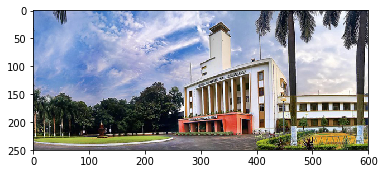

In [4]:
#Loading an image
img = Image.open('data/iitkgp.jpg')
plt.imshow(img) # display the image
print('Image size: '+str(img.size)) # image dimensions

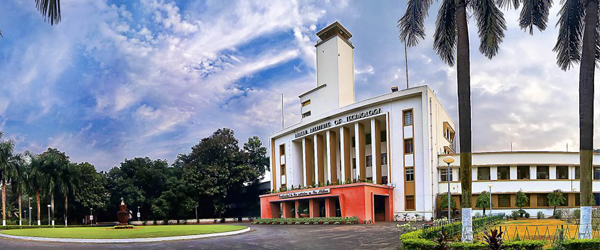

In [8]:
img1 = Image.open.

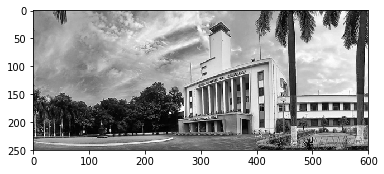

In [5]:
#Converting an image to grayscale
img_gray = img.convert('L') 
plt.imshow(np.asarray(img_gray),cmap='gray')

#Saving an image
img_gray.save('tut01-results/iitkgp_gray.png')

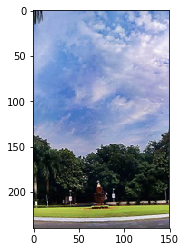

In [7]:
#Cropping an image
box = (50,10,200,250) # top-left and bottom right co-ordinates of the region to be cropped
img_crop = img.crop(box)
plt.imshow(img_crop)

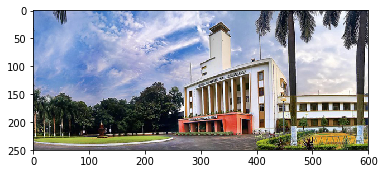

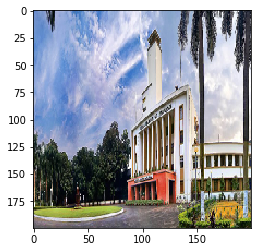

In [9]:
#Resizing an image
img_resz = img.resize((200,200))
plt.figure()
plt.imshow(np.asarray(img))
plt.figure()
plt.imshow(np.asarray(img_resz))

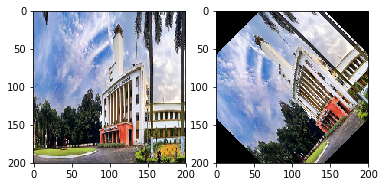

In [12]:
#Rotating an image
img_rot = img_resz.rotate(45) # anti-clockwise rotation
plt.subplot(1,2,1)
plt.imshow(img_resz)
plt.subplot(1,2,2)
plt.imshow(img_rot)

In [14]:
range(3)

range(0, 3)

['data/images/tiger.jpg', 'data/images/lion.jpg', 'data/images/panda.jpg', 'data/images/zebra.jpg']


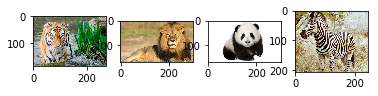

In [13]:
#Read all the images from a folder
import os
    # Function that returns a list containing the names of image files in a folder
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

img_list = get_imlist('data/images') # list containing filenames
range(3)
print(img_list)
    # Displaying the images
for fileNum in range(len(img_list)):
    im = Image.open(img_list[fileNum])
    plt.subplot(1,len(img_list),fileNum+1)
    plt.imshow(im)

In [15]:
len(img_list)

4

<BarContainer object of 256 artists>

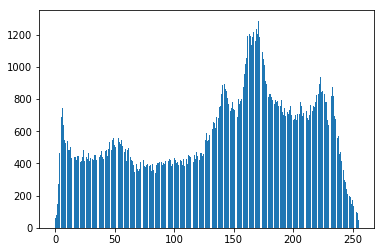

In [16]:
from matplotlib.pyplot import bar
#Histogram of images
img_hist = img_gray.histogram()
bar(range(256),img_hist)

In [17]:
# Converting to numpy array and properties
img_arr = np.array(img)
print(img_arr.shape, img_arr.dtype)
img_grayarr = np.array(img.convert('L'),'f') # 'f' => floating point
print(img_grayarr.shape, img_grayarr.dtype)

(250, 600, 3) uint8
(250, 600) float32


In [18]:
# Acessing an element in an array
px1 = img_arr[100,100,2]
print('px1: '+ str(px1))

# Accessing multiple elements by slicing
px2 = img_grayarr[100,:] # all the elemts in a row
#print('px2: '+ str(px2))

px3 = img_grayarr[100,30:40] # range of elements in a row
print('px3: '+ str(px3))

px4 = img_grayarr[:,-1] # last column
#print('px4: '+ str(px4))

px1: 208
px3: [163. 158. 154. 156. 159. 159. 158. 159. 159. 161.]


0.0 255.0
100.0 200.0


<BarContainer object of 256 artists>

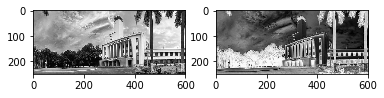

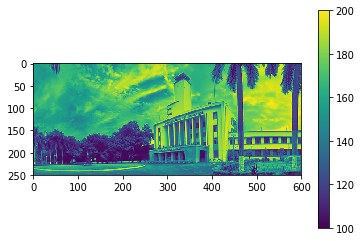

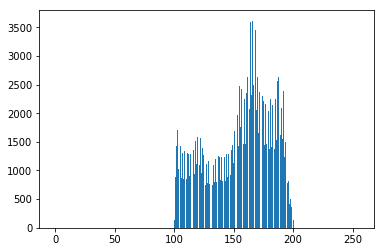

In [20]:
# Graylevel transformations
img_grayinv = 255-img_grayarr
plt.figure()
plt.subplot(121)
plt.imshow(img_grayarr,'gray')
plt.subplot(122)
plt.imshow(img_grayinv,'gray')

img_clamp = (100.0/255) * img_grayarr + 100 #clamp to interval 100...200
plt.figure()
plt.imshow(img_clamp)
plt.colorbar()

# Minimum and maximum values
print(img_grayarr.min(),img_grayarr.max())
print(img_clamp.min(),img_clamp.max())

img_clamp_hist,_ = np.histogram(img_clamp, range=(0,255), bins=256)
plt.figure()
bar(range(256),img_clamp_hist)

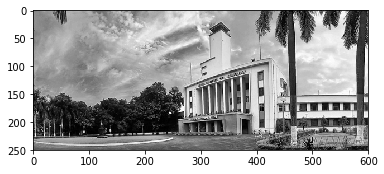

In [21]:
# Array to image
pil_img = Image.fromarray(np.uint8(img_clamp))
plt.imshow(np.asarray(pil_img),'gray')
# pil_img.show()

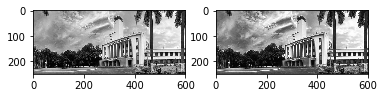

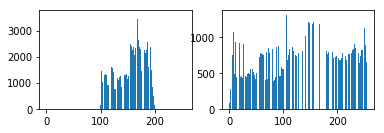

In [22]:
# Histogram equivalization
img_clamp_hist,bins = np.histogram(img_clamp.flatten(),range=(0,255),bins=256)
cdf = img_clamp_hist.cumsum() # cumulative distribution function
cdf = 255 * cdf / cdf[-1] # normalize
# use linear interpolation of cdf to find new pixel values
img_clampeq = np.interp(img_clamp.flatten(),bins[:-1],cdf).reshape(img_grayarr.shape)
img_clampeq_hist,_ = np.histogram(img_clampeq.flatten(),range=(0,255),bins=256)
plt.subplot(2,2,1)
plt.imshow(np.uint8(img_clamp),'gray')
plt.subplot(2,2,2)
plt.imshow(np.uint8(img_clampeq),'gray')
plt.figure()
plt.subplot(2,2,3)
bar(range(256),img_clamp_hist)
plt.subplot(2,2,4)
bar(range(256),img_clampeq_hist)

Image.fromarray(np.uint8(img_clamp)).save('tut01-results/iitkgp_clamp.png') 
Image.fromarray(np.uint8(img_clampeq)).save('tut01-results/iitkgp_clampEq.png')

### Using Pickle module for saving data

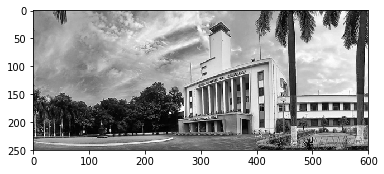

In [23]:
import pickle
# Saving data
with open('tut01-results/image_array.pkl','wb') as f:  # 'with' automatically handles opening and closing of files
    pickle.dump(img_grayarr,f)    

# Loading data
with open('tut01-results/image_array.pkl','rb') as f:
    img_ar = pickle.load(f)

plt.imshow(img_ar,'gray')

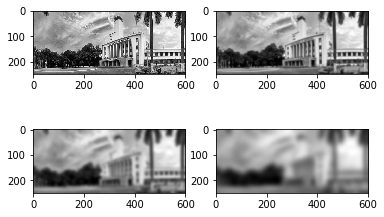

In [24]:
# Blurring images
from scipy.ndimage import filters

img_blur1 = filters.gaussian_filter(img_gray,2) # sigma(sd) = 2
img_blur2 = filters.gaussian_filter(img_gray,5) # sigma = 5
img_blur3 = filters.gaussian_filter(img_gray,10) # sigma = 10
plt.subplot(2,2,1)
plt.imshow(np.array(img_gray),'gray')
plt.subplot(2,2,2)
plt.imshow(img_blur1,'gray')
plt.subplot(2,2,3)
plt.imshow(img_blur2,'gray')
plt.subplot(2,2,4)
plt.imshow(img_blur3,'gray')

In [ ]:
# Image gradients

#Sobel derivative filters
imx = np.zeros(img_grayarr.shape) 
filters.sobel(img_grayarr,1,imx) # operates on arrays!
imy = np.zeros(img_grayarr.shape)
filters.sobel(img_grayarr,0,imy)
img_grad = np.sqrt(imx**2+imy**2) # ** ==> squaring

plt.subplot(2,2,1)
plt.imshow(np.array(img_gray),'gray')
plt.subplot(2,2,2)
plt.imshow(imx,'gray')
plt.subplot(2,2,3)
plt.imshow(imy,'gray')
plt.subplot(2,2,4)
plt.imshow(img_grad,'gray')

### Feature extraction

In [ ]:
from skimage import feature

In [ ]:
# Co-ocurance matrix
coMatFeat = feature.greycomatrix(np.uint8(img_grayarr), [1], [np.pi/4],normed=True,levels=256) 
print(coMatFeat.shape)

# Properties of GLCM
coPropFeat = feature.greycoprops(coMatFeat, prop= 'homogeneity')
print(coPropFeat)

In [ ]:
# Histogram of Oriented Gradients
hogFeat = feature.hog(img_grayarr, orientations=4, pixels_per_cell=(50,50),block_norm='L2-Hys')
print(hogFeat.shape)

In [ ]:
# Local binary pattern
lbpFeat = feature.local_binary_pattern(img_grayarr, 35, 15)
plt.imshow(lbpFeat,'gray')
print(lbpFeat.shape)